In [13]:
import os
from PIL import Image

# Function to crop and save the image
def crop_image(input_path, output_path):
    try:
        # Open an image file
        with Image.open(input_path) as img:
            # Crop the image
            cropped_img = img.crop((102, 48, 696, 582))  # Adjust coordinates as needed
            # Save the cropped image
            cropped_img.save(output_path)
            #print(f'Cropped image saved at: {output_path}')
    except Exception as e:
        print(f'Error cropping image {input_path}: {e}')

def crop_images_in_folder(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate over all files in the input folder and assign sequential names
    counter = 1
    for filename in os.listdir(input_folder):
        if filename.endswith('.png'):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, f'img{counter}.png')
            # Crop and save each image
            crop_image(input_path, output_path)
            counter += 1

# Example usage
input_folder = r"D:\Dataset_Test1\rc_plane_2\rcplane2_test" 
output_folder = r"D:\Dataset_Test1\rc_plane_2\rcplane2_test_1"  # Replace with your output folder path

# Call the function to crop images
crop_images_in_folder(input_folder, output_folder)


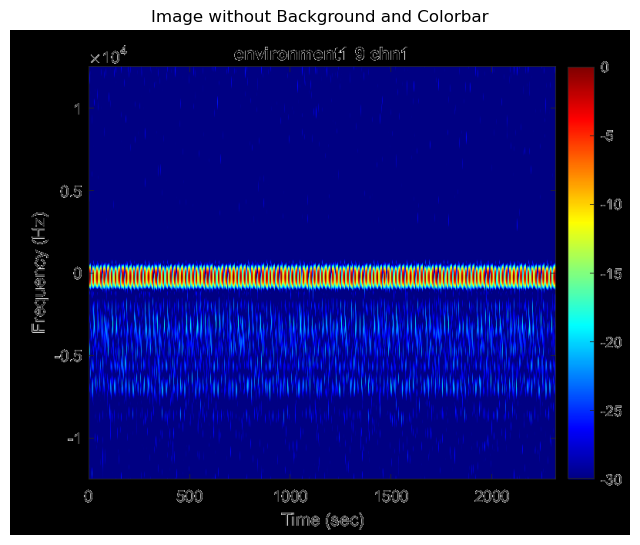

Image saved to cleaned_image.png


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image
image_path = r"C:\Users\user\Downloads\environment1\environment1\environment1_9_chn1.png"  # Replace with the path to your image
image = cv2.imread(image_path)

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Threshold to remove the white background
_, mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV)  # Mask for non-white areas

# Step 4: Apply the mask to the original image
object_only = cv2.bitwise_and(image, image, mask=mask)

# Step 5: Crop the image to remove the colorbar (assume it's on the right side)
height, width = object_only.shape[:2]
cropped_image = object_only[:, :int(width * 0.92)]  # Crop approximately 8% of the image width

# Step 6: Display the cleaned image
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title("Image without Background and Colorbar")
plt.show()

# Optional: Save the result
output_path = "cleaned_image.png"
cv2.imwrite(output_path, cropped_image)
print(f"Image saved to {output_path}")


In [2]:
import cv2
import numpy as np

# Load the image
image_path = r"C:\Users\user\Downloads\environment1\environment1\environment1_9_chn1.png"  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert to grayscale for thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to detect the white background and isolate the content
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Find contours from the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding rectangle around the largest contour (main content)
x, y, w, h = cv2.boundingRect(contours[0])

# Crop the image to this bounding box
cropped_image = image[y:y+h, x:x+w]

# Save the cropped image
output_path = "cropped_image.png"
cv2.imwrite(output_path, cropped_image)

print(f"Cropped image saved to {output_path}")


Cropped image saved to cropped_image.png
